In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import dateutil as du
import os

In [2]:
stocks = pd.read_csv('STX.csv', index_col='Date',parse_dates=True)
stocks.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,59.810001,60.639999,59.770000,60.500000,56.000420,2018200
2020-01-03,59.860001,60.049999,58.810001,58.910000,54.528671,1649700
2020-01-06,58.400002,58.709999,57.900002,58.209999,53.880730,1995900


In [3]:
stocks.info

<bound method DataFrame.info of                  Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2020-01-02  59.810001  60.639999  59.770000  60.500000  56.000420  2018200
2020-01-03  59.860001  60.049999  58.810001  58.910000  54.528671  1649700
2020-01-06  58.400002  58.709999  57.900002  58.209999  53.880730  1995900
2020-01-07  58.500000  59.040001  58.020000  58.910000  54.528671  1914400
2020-01-08  58.900002  59.900002  58.490002  59.369999  54.954456  2541200
...               ...        ...        ...        ...        ...      ...
2021-08-25  85.900002  89.529999  85.900002  86.889999  86.188179  3235600
2021-08-26  86.930000  87.199997  84.639999  84.739998  84.055542  2325000
2021-08-27  84.860001  87.099998  84.839996  86.309998  85.612862  1659000
2021-08-30  86.349998  87.269997  85.779999  86.839996  86.138580  1484200
2021-08-31  87.010002  88.230003  86.550003  87.589996  86.882523  1

In [4]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
from pandas.tseries.holiday import AbstractHolidayCalendar, Holiday, nearest_workday

In [5]:
rng = stocks.index
rng

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2021-08-18', '2021-08-19', '2021-08-20', '2021-08-23',
               '2021-08-24', '2021-08-25', '2021-08-26', '2021-08-27',
               '2021-08-30', '2021-08-31'],
              dtype='datetime64[ns]', name='Date', length=420, freq=None)

In [8]:
USFederalHolidayCalendar().rules

[Holiday: New Years Day (month=1, day=1, observance=<function nearest_workday at 0x7f25a6c6fc20>),
 Holiday: Martin Luther King Jr. Day (month=1, day=1, offset=<DateOffset: weekday=MO(+3)>),
 Holiday: Presidents Day (month=2, day=1, offset=<DateOffset: weekday=MO(+3)>),
 Holiday: Memorial Day (month=5, day=31, offset=<DateOffset: weekday=MO(-1)>),
 Holiday: July 4th (month=7, day=4, observance=<function nearest_workday at 0x7f25a6c6fc20>),
 Holiday: Labor Day (month=9, day=1, offset=<DateOffset: weekday=MO(+1)>),
 Holiday: Columbus Day (month=10, day=1, offset=<DateOffset: weekday=MO(+2)>),
 Holiday: Veterans Day (month=11, day=11, observance=<function nearest_workday at 0x7f25a6c6fc20>),
 Holiday: Thanksgiving (month=11, day=1, offset=<DateOffset: weekday=TH(+4)>),
 Holiday: Christmas (month=12, day=25, observance=<function nearest_workday at 0x7f25a6c6fc20>)]

In [9]:
class MyCustomCalendar(AbstractHolidayCalendar):
  rules = [
           USFederalHolidayCalendar().rules[0],
           Holiday('Christmas',month = 1, day = 7, observance=nearest_workday),
           Holiday('8thOfMarch',month = 3, day = 8),
           Holiday('UkrLaborDay',month = 5, day = 1, observance=nearest_workday),
           Holiday('Easter',month = 5, day = 2, observance=nearest_workday),
           Holiday('VictoryDay',month = 5, day = 9, observance=nearest_workday),
           Holiday('TrinityDay',month = 6, day = 20),
           Holiday('UkrConstitutionDay',month = 6, day = 28, observance=nearest_workday),
           Holiday('UkrIndependanceDay',month = 8, day = 24, observance=nearest_workday),
           Holiday('UkrDefendersDay',month = 10, day = 14, observance=nearest_workday),
           USFederalHolidayCalendar().rules[1],
           USFederalHolidayCalendar().rules[2],
           USFederalHolidayCalendar().rules[3],
           USFederalHolidayCalendar().rules[4],
           USFederalHolidayCalendar().rules[5],
           USFederalHolidayCalendar().rules[6],
           USFederalHolidayCalendar().rules[7],
           USFederalHolidayCalendar().rules[8],
           USFederalHolidayCalendar().rules[9]
  ]

In [10]:
myCalendar = MyCustomCalendar()

In [11]:
usb=CustomBusinessDay(calendar=myCalendar)
usb

<CustomBusinessDay>

In [17]:
d= [stocks.index,stocks.Close]
d

[DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
                '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
                '2020-01-14', '2020-01-15',
                ...
                '2021-08-18', '2021-08-19', '2021-08-20', '2021-08-23',
                '2021-08-24', '2021-08-25', '2021-08-26', '2021-08-27',
                '2021-08-30', '2021-08-31'],
               dtype='datetime64[ns]', name='Date', length=420, freq=None),
 Date
 2020-01-02    60.500000
 2020-01-03    58.910000
 2020-01-06    58.209999
 2020-01-07    58.910000
 2020-01-08    59.369999
                 ...    
 2021-08-25    86.889999
 2021-08-26    84.739998
 2021-08-27    86.309998
 2021-08-30    86.839996
 2021-08-31    87.589996
 Name: Close, Length: 420, dtype: float64]

In [22]:
data = stocks.drop(columns=['Open','High','Low','Adj Close' ,'Volume'])
data

,Close
Date,
2020-01-02,60.500000
2020-01-03,58.910000
2020-01-06,58.209999
2020-01-07,58.910000
2020-01-08,59.369999
...,...
2021-08-25,86.889999
2021-08-26,84.739998
2021-08-27,86.309998


In [24]:
rwe_mean=data.rolling(48).mean()
rwe_mean

,Close
Date,
2020-01-02,NaN
2020-01-03,NaN
2020-01-06,NaN
2020-01-07,NaN
2020-01-08,NaN
...,...
2021-08-25,87.750625
2021-08-26,87.738958
2021-08-27,87.759791


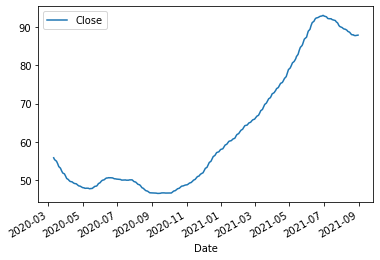

In [37]:
rwe_mean.plot()

In [25]:
dnew = pd.concat([data,rwe_mean],axis = 1)
dnew.columns=['Close','Mean']
dnew

,Close,Mean
Date,,
2020-01-02,60.500000,NaN
2020-01-03,58.910000,NaN
2020-01-06,58.209999,NaN
2020-01-07,58.910000,NaN
2020-01-08,59.369999,NaN
...,...,...
2021-08-25,86.889999,87.750625
2021-08-26,84.739998,87.738958
2021-08-27,86.309998,87.759791


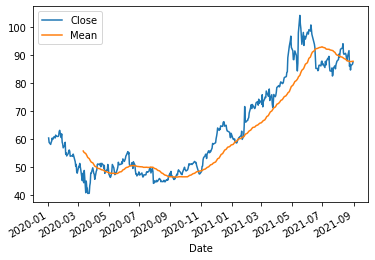

In [27]:
dnew.plot()

In [29]:
data=data.asfreq('D',method='pad')
data['Shift']= data.tshift(20)
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  


,Close,Shift
Date,,
2020-01-02,60.500000,NaN
2020-01-03,58.910000,NaN
2020-01-04,58.910000,NaN
2020-01-05,58.910000,NaN
2020-01-06,58.209999,NaN
...,...,...
2021-08-27,86.309998,92.150002
2021-08-28,86.309998,92.150002
2021-08-29,86.309998,92.519997


In [35]:
data['Percentage']=100-((data['Close']/data['Shift'])*100)
data

,Close,Shift,Percentage
Date,,,
2020-01-02,60.500000,NaN,NaN
2020-01-03,58.910000,NaN,NaN
2020-01-04,58.910000,NaN,NaN
2020-01-05,58.910000,NaN,NaN
2020-01-06,58.209999,NaN,NaN
...,...,...,...
2021-08-27,86.309998,92.150002,6.337497
2021-08-28,86.309998,92.150002,6.337497
2021-08-29,86.309998,92.519997,6.712061


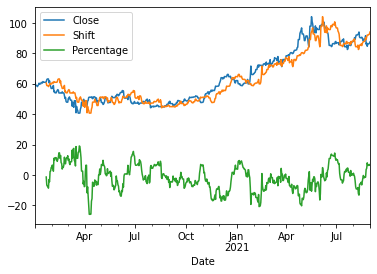

In [36]:
data.plot()